In [1]:
using BenchmarkTools, DataFrames, ExcelFiles, XLSX, Plots, LinearRegression, Polynomials, Plots.PlotMeasures, LinearAlgebra

In [2]:
function input(prompt::String = "") #definition of the input function in order to feed the program the needed parameters.
    print(prompt * " ")
    chomp(readline())
end

file = input("File's name:") #we feed the program the file name, sheet number and data range.
sheet = input("Sheet number:")
datarng = input("data range:")


stdin> d
stdin> 
stdin> 
File's name: Sheet number: data range: 

""

In [3]:
table1 = XLSX.readdata("enzyme_kinetics_absorbance.xlsx", "Sheet2", "A4:B10") #read data
                                                                              #from excel file

7×2 Matrix{Any}:
 0       0
 0.0025  0.0696
 0.005   0.176
 0.0075  0.25
 0.01    0.34
 0.0125  0.43
 0.015   0.516

In [4]:
sub = convert(Vector{Float64}, table1[:,1]) #convert absorbance curve data into a vector
absor = convert(Vector{Float64}, table1[:,2])

7-element Vector{Float64}:
 0.0
 0.0696
 0.176
 0.25
 0.34
 0.43
 0.516

In [5]:
#for i = 1:length(sub)
    #if typeof(i) == typeof("String")
        #deleteat!(sub, i)
    #end
#end
#return sub

In [13]:
stan_cuv = linregress(sub, absor) #linear equation for the absorbance data 

m = LinearRegression.slope(stan_cuv)
b = LinearRegression.bias(stan_cuv)

-0.006142857142857239

In [14]:
A = convert(Matrix{Float64}, XLSX.readdata("enzyme_kinetics_absorbance.xlsx", "Sheet2", "B16:G28"))
#enzyme assays matrix

13×6 Matrix{Float64}:
 0.0   0.182  0.071  0.057  0.035  0.12
 0.25  0.845  0.55   0.646  0.474  0.46
 0.5   1.314  1.07   1.034  0.743  0.703
 0.75  1.7    1.455  1.264  0.965  0.828
 1.0   2.064  1.719  1.437  1.106  0.899
 1.25  2.173  1.941  1.573  1.204  0.95
 1.5   2.433  2.109  1.672  1.276  0.987
 1.75  2.77   2.252  1.743  1.326  1.012
 2.0   2.654  2.358  1.798  1.362  1.031
 2.25  2.768  2.433  1.84   1.388  1.044
 2.5   2.857  2.51   1.873  1.408  1.053
 2.75  2.981  2.537  1.898  1.423  1.06
 3.0   2.991  2.602  1.917  1.435  1.064

In [15]:
function slicematrix(A::AbstractMatrix)
    return [A[:,i] for i in 1:size(A,2)] #we break every matrix column into a vector
end

slicematrix (generic function with 1 method)

In [16]:
x = slicematrix(A)

6-element Vector{Vector{Float64}}:
 [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
 [0.182, 0.845, 1.314, 1.7, 2.064, 2.173, 2.433, 2.77, 2.654, 2.768, 2.857, 2.981, 2.991]
 [0.071, 0.55, 1.07, 1.455, 1.719, 1.941, 2.109, 2.252, 2.358, 2.433, 2.51, 2.537, 2.602]
 [0.057, 0.646, 1.034, 1.264, 1.437, 1.573, 1.672, 1.743, 1.798, 1.84, 1.873, 1.898, 1.917]
 [0.035, 0.474, 0.743, 0.965, 1.106, 1.204, 1.276, 1.326, 1.362, 1.388, 1.408, 1.423, 1.435]
 [0.12, 0.46, 0.703, 0.828, 0.899, 0.95, 0.987, 1.012, 1.031, 1.044, 1.053, 1.06, 1.064]

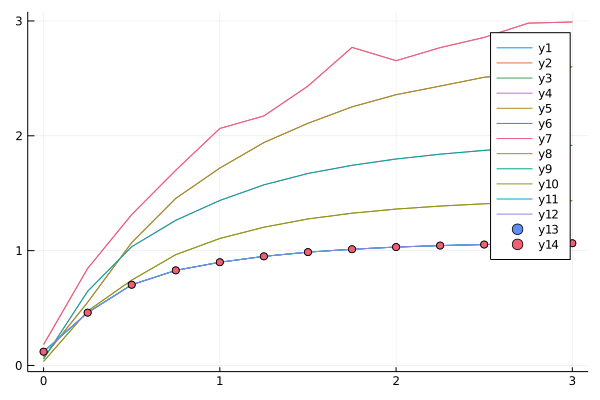

In [24]:
for i = length(x)
    p = scatter!(x[1], x[i], xlabel="Concentración (M)", ylabel="Vo (mol/min)")
display(p)
end

In [10]:
abs_rate = Float64[]

for i in 2:length(x)
    pfit = fit(x[1], x[i], 2) #the program calculates a polynomial correlation function
    push!(abs_rate, pfit[1]) #for every data vector and moves it to the data array.
end
return abs_rate 

5-element Vector{Float64}:
 1.991690309690309
 1.8407752247752236
 1.4051468531468525
 1.1010349650349642
 0.7629690309690308

Linear equation $$y= 34.75x - 0.0061 \Longrightarrow x = \frac{y + 0.0061}{34.75}$$

When we obtain the values of $x$ we would have gotten the rate of $\frac{\mu mol}{min}$ of substrate

We multiply each value times $10$ and then divide it by $10^6 \Longrightarrow \text{we divide by} 10^5$. Since the essay were made in a volume of 1 ml and not 0.25 ml we multiply each value by $4$ and we get the final result. 

In [11]:
subs = [1, 0.33, 0.2, 0.14, 0.1]

mol_rate = ((abs_rate .+ b) /m) ./ 10^5 #this factor should be change depending 
                                       #on the dilution factor used in experiments

5×1 Matrix{Float64}:
 5.713101022620913e-7
 5.278866562572575e-7
 4.025414325891139e-7
 3.1503801197158605e-7
 2.1776484777964538e-7

In [12]:
inv_sub = 1 ./ subs #calculate the inverse value for the absorance and substrate. 

inv_mol_rate = 1 ./ mol_rate

5×1 Matrix{Float64}:
 1.7503628870564678e6
 1.8943460459676126e6
 2.4842163291566805e6
 3.1742201321731047e6
 4.592109379434336e6

In [13]:
LWB = linregress(inv_sub, inv_mol_rate) #linear equation for the inverse values

LinearRegression.LinearRegressor{Matrix{Float64}}(true, [320541.21670024487; 1.1011356333986106e6;;])

In [14]:
m1 = LinearRegression.slope(LWB) #slope 
b1 = LinearRegression.bias(LWB) #y intercept

1×1 view(::Matrix{Float64}, 2:2, :) with eltype Float64:
 1.1011356333986106e6

In [15]:
Vmax = 1 ./ b1

Km = m1 * Vmax

1×1 Matrix{Float64}:
 0.2911005756038494

In [21]:
println("Vmax = ", Vmax)
println("Km = ", round.(Km, digits=4))

Vmax = [9.081533370358204e-7;;]
